In [1]:
import xgboost
print(xgboost.__version__)

0.90


In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [7]:
# 테스트데이터와 학습용 데이터를 분할한다.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2)

In [8]:
# 파이썬 XGBoost는 학습용, 테스트용 데이터 set을 위해 객체 DMatrix를 생성한다.
# DMatrix는 XGBoost만의 전용 데이터 셋인데 입력 파라미터는 data, label 이다.
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [9]:
# 하이퍼 파라미터를 dictionary 형태로 입력한다.
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping': 100
}
num_rounds = 400

# tree의 max_depth 는 3개
# eta는 0.1
# 이진분류이기 때문에 목적함수는 binary:logistic 이다.
# 오류함수의 평가 지표는 logloss
# 부스팅 반복 횟수는 400회

In [12]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, evals = wlist)

[0]	train-logloss:0.469114	eval-logloss:0.511196
[1]	train-logloss:0.341432	eval-logloss:0.410602
[2]	train-logloss:0.259137	eval-logloss:0.335213
[3]	train-logloss:0.198553	eval-logloss:0.2885
[4]	train-logloss:0.153241	eval-logloss:0.251347
[5]	train-logloss:0.125127	eval-logloss:0.225166
[6]	train-logloss:0.100871	eval-logloss:0.209255
[7]	train-logloss:0.082188	eval-logloss:0.193752
[8]	train-logloss:0.069056	eval-logloss:0.184835
[9]	train-logloss:0.05869	eval-logloss:0.178085
[10]	train-logloss:0.050662	eval-logloss:0.178395
[11]	train-logloss:0.044147	eval-logloss:0.175087
[12]	train-logloss:0.038258	eval-logloss:0.166241
[13]	train-logloss:0.033458	eval-logloss:0.162854
[14]	train-logloss:0.030058	eval-logloss:0.159276
[15]	train-logloss:0.02687	eval-logloss:0.162769
[16]	train-logloss:0.024576	eval-logloss:0.164725
[17]	train-logloss:0.022274	eval-logloss:0.16384
[18]	train-logloss:0.020277	eval-logloss:0.158924
[19]	train-logloss:0.018751	eval-logloss:0.159615
[20]	train-logl

[164]	train-logloss:0.004766	eval-logloss:0.179654
[165]	train-logloss:0.004766	eval-logloss:0.179654
[166]	train-logloss:0.004766	eval-logloss:0.179654
[167]	train-logloss:0.004766	eval-logloss:0.179654
[168]	train-logloss:0.004766	eval-logloss:0.179654
[169]	train-logloss:0.004766	eval-logloss:0.179654
[170]	train-logloss:0.004766	eval-logloss:0.179654
[171]	train-logloss:0.004766	eval-logloss:0.179654
[172]	train-logloss:0.004766	eval-logloss:0.179654
[173]	train-logloss:0.004766	eval-logloss:0.179654
[174]	train-logloss:0.004766	eval-logloss:0.179654
[175]	train-logloss:0.004766	eval-logloss:0.179654
[176]	train-logloss:0.004766	eval-logloss:0.179654
[177]	train-logloss:0.004766	eval-logloss:0.179654
[178]	train-logloss:0.004766	eval-logloss:0.179654
[179]	train-logloss:0.004766	eval-logloss:0.179654
[180]	train-logloss:0.004766	eval-logloss:0.179654
[181]	train-logloss:0.004766	eval-logloss:0.179654
[182]	train-logloss:0.004766	eval-logloss:0.179654
[183]	train-logloss:0.004766	ev

[325]	train-logloss:0.004766	eval-logloss:0.179654
[326]	train-logloss:0.004766	eval-logloss:0.179654
[327]	train-logloss:0.004766	eval-logloss:0.179654
[328]	train-logloss:0.004766	eval-logloss:0.179654
[329]	train-logloss:0.004766	eval-logloss:0.179654
[330]	train-logloss:0.004766	eval-logloss:0.179654
[331]	train-logloss:0.004766	eval-logloss:0.179654
[332]	train-logloss:0.004766	eval-logloss:0.179654
[333]	train-logloss:0.004766	eval-logloss:0.179654
[334]	train-logloss:0.004766	eval-logloss:0.179654
[335]	train-logloss:0.004766	eval-logloss:0.179654
[336]	train-logloss:0.004766	eval-logloss:0.179654
[337]	train-logloss:0.004766	eval-logloss:0.179654
[338]	train-logloss:0.004766	eval-logloss:0.179654
[339]	train-logloss:0.004766	eval-logloss:0.179654
[340]	train-logloss:0.004766	eval-logloss:0.179654
[341]	train-logloss:0.004766	eval-logloss:0.179654
[342]	train-logloss:0.004766	eval-logloss:0.179654
[343]	train-logloss:0.004766	eval-logloss:0.179654
[344]	train-logloss:0.004766	ev

In [18]:
# predict()을 통해서 예측 확률값을 반환하고 예측 값으로 변환한다.
pred_probs = xgb_model.predict(dtest)
print(pred_probs[:10], 3)
# 예측 확률이 0.5보다 크면 1 그렇지 않으면 0으로 예측값 결정
pred = [1 if x > 0.5 else 0 for x in pred_probs]
print(pred[:10])

[9.9978632e-01 9.9983633e-01 9.9990821e-01 9.9975842e-01 9.8415411e-01
 8.8424170e-01 9.5581806e-01 9.9962533e-01 3.4297042e-04 1.0000246e-03] 3
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도')
    print(accuracy)
    print('정밀도')
    print(precision)
    print('재현율')
    print(recall)
    print('F1')
    print(f1)
    print('AUC')
    print(roc_auc)
    
    

In [20]:
get_clf_eval(y_test, pred, pred_probs)

오차 행렬
[[38  6]
 [ 2 68]]
정확도
0.9298245614035088
정밀도
0.918918918918919
재현율
0.9714285714285714
F1
0.9444444444444445
AUC
0.9175324675324675


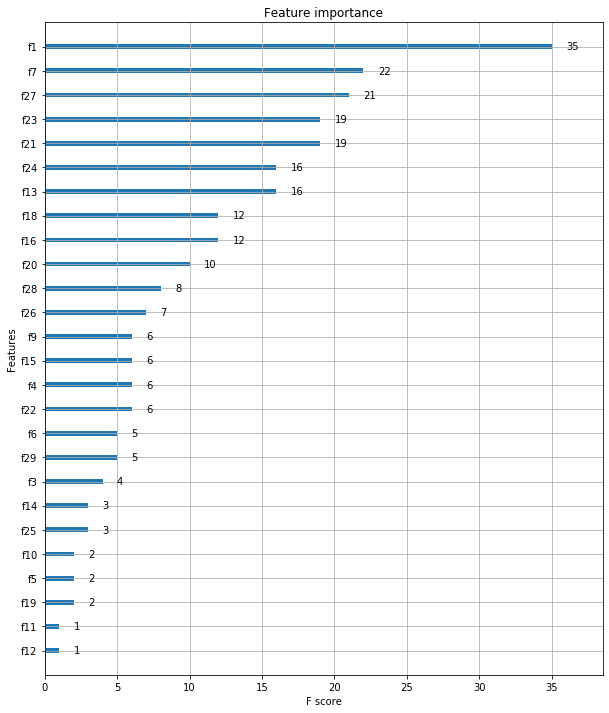

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
# 사이킷런 XGBoost

In [24]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [25]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[39  5]
 [ 2 68]]
정확도
0.9385964912280702
정밀도
0.9315068493150684
재현율
0.9714285714285714
F1
0.9510489510489512
AUC
0.928896103896104
